In [76]:
import pandas as pd
import os
import datetime
#import numpy as np
#import seaborn as sns
#import matplotlib
import bokeh
from bokeh.plotting import figure, output_file, show

In [166]:
path_pkl = '.\\ACHD_Eagle-Fairview'
#path_pkl = '.\\ex25'
df_comb = pd.read_pickle(os.path.join(path_pkl,'df_comb.pk'))
df_raw = pd.read_pickle(os.path.join(path_pkl,'df_raw.pk'))

In [17]:
df_42=df_comb.loc[(df_comb.Code==82) & (df_comb.ID==42)]
df_42.head()

,TS_start,Code,ID,Cycle_Start,TS_end,t_cs,t_ce,Duration,Det_Status,Ph_Status,...,Det 35 Status,Det 36 Status,Det 38 Status,Det 39 Status,Det 40 Status,Det 42 Status,Det 43 Status,Det 45 Status,Det 47 Status,Det 48 Status
22,2023-08-21 10:15:41.600,82,42,2023-08-21 10:15:33.900,2023-08-21 10:16:21.600,7.7,47.7,40.0,On,G,...,Off,Off,NaN,NaN,NaN,On,NaN,Off,Off,NaN
149,2023-08-21 10:16:25.000,82,42,2023-08-21 10:15:33.900,2023-08-21 10:16:27.600,51.1,53.7,2.6,On,Y,...,On,Off,On,Off,Off,On,Off,Off,Off,Off
349,2023-08-21 10:18:12.300,82,42,2023-08-21 10:17:32.300,2023-08-21 10:18:52.500,40.0,80.2,40.2,On,Rc,...,On,Off,Off,Off,Off,On,Off,Off,Off,Off
701,2023-08-21 10:20:51.900,82,42,2023-08-21 10:20:28.300,2023-08-21 10:21:31.200,23.6,62.9,39.3,On,Y,...,Off,Off,Off,Off,Off,On,Off,Off,Off,Off
1859,2023-08-21 10:31:22.600,82,42,2023-08-21 10:31:08.600,2023-08-21 10:31:47.500,14.0,38.9,24.9,On,G,...,Off,On,On,Off,Off,On,Off,Off,Off,Off


In [168]:
df_p6 = filter_day(df_raw, 'TS_start', ['Saturday'])
df_p6 = filter_time(df_p6, 'TS_start', '8:00', '22:00')
df_p6 = filter_time(df_p6, 'TS_start', '19:00', '9:30')
df_p6 = filter_date(df_p6, '2023-06-01', '2023-06-30')

In [158]:
df_p4 = filter_day(df_raw, 'TS_start', ['Saturday'])
df_p4 = filter_time(df_p4, 'TS_start', '9:30', '19:00')
df_p4 = filter_date(df_p4, '2023-06-01', '2023-06-30')

In [169]:
df_cyc = cyc_counts(df_p6)
df_cyc = df_cyc.rename(columns={'Hour':'Cycles'})
sum_by_hour(df_cyc)

,Cycles
Hour,
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,4
8,99


In [170]:
df_cyc.sum()/4

Cycles     114.25
Hour      1501.50
dtype: float64

In [204]:
df_ped = ped_counts(df_p6)
print(sum_by_hour(df_ped))

ID    2  4  6  8  Total
Hour                   
0     0  0  0  0      0
1     0  0  0  0      0
2     0  0  0  0      0
3     0  0  0  0      0
4     0  0  0  0      0
5     0  0  0  0      0
6     0  0  0  0      0
7     0  0  0  0      0
8     2  1  4  1      8
9     0  0  0  1      1
10    0  0  0  0      0
11    0  0  0  0      0
12    0  0  0  0      0
13    0  0  0  0      0
14    0  0  0  0      0
15    0  0  0  0      0
16    0  0  0  0      0
17    0  0  0  0      0
18    0  0  0  0      0
19    3  0  5  4     12
20    1  2  7  5     15
21    2  0  1  2      5
22    0  0  0  0      0
23    0  0  0  0      0


C:\Users\dadams\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\dadams\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [181]:
df_ped.sum()/4

ID
2           2.00
4           0.75
6           4.25
8           3.25
Total      10.25
Hour     1464.00
dtype: float64

MISCELLANEOUS CODE SNIPPETS FOR FUTURE USE

In [47]:
[i for i in list(locals().keys()) if i.startswith('df')]

['df_raw', 'df_comb', 'df_r1', 'df_r2']

In [58]:
df_b = df_gyr[df_gyr.TS_start < '2021-05-28']
df_a = df_gyr[df_gyr.TS_start >= '2021-05-28']

df_cla = df_a[(df_a.Code==11) & (df_a.ID==8) & (df_a.t_ce <300)].t_ce
df_clb = df_b[(df_b.Code==11) & (df_b.ID==8) & (df_b.t_ce <300)].t_ce

In [74]:
df_gyr = df_gyr[(df_gyr.TS_start.between('2021-05-28 06:30:00', '2021-05-28 11:00:00')) |
      (df_gyr.TS_start.between('2021-05-28 13:30:00', '2021-05-28 19:30:00'))]

<AxesSubplot:>

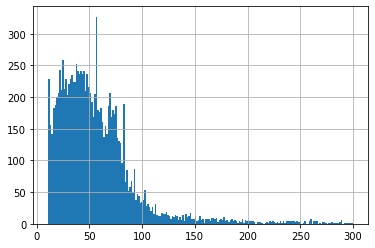

In [61]:
df_cla.hist(bins=200)

Count of Max out vs. Gap out

In [28]:
phs = [1,2,6,8]
ts = 13
te = 17 #includes this hour (e.g. if "18" then will count till 6:59:69 PM)
days = [2,3,4] # 0-6 = Sunday-Saturday

df = df_raw

df_b = df[df.TS_start < '2021-06-19']
df_a = df[df.TS_start >= '2021-06-19']

for ph in phs:
    print('Phase '+ str(ph) + '\n')
    for d in [df_b, df_a]:
        
        if len(d)>0:
            df_wd = d.loc[pd.Series(d.TS_start.dt.weekday).isin(days),:]
            df_peak = df_wd.loc[pd.Series(df_wd.TS_start.dt.hour).between(ts,te),:]

            tot = len(df_peak[(df_peak.Code == 0) & (df_peak.ID == ph)])
            mo = len(df_peak[(df_peak.Code == 5) & (df_peak.ID == ph)])
            go = len(df_peak[(df_peak.Code == 4) & (df_peak.ID == ph)])

            print('total: ' + str(tot) + "\n" + # total cycles
                  'max out: ' + str(mo) + '\n' + # max out
                  'gap out: ' + str(go) + '\n' + # gap out
                  'MO pct: ' + str(mo/tot) + '\n\n') # mo/tot
        
del phs, ts, te, days, df_b, df_a, ph, df_wd, df_peak, tot, mo, go, df

Phase 1

total: 856
max out: 232
gap out: 623
MO pct: 0.27102803738317754


Phase 2

total: 1050
max out: 443
gap out: 608
MO pct: 0.4219047619047619


Phase 6

total: 1054
max out: 75
gap out: 977
MO pct: 0.07115749525616698


Phase 8

total: 1052
max out: 615
gap out: 436
MO pct: 0.5846007604562737




In [14]:
df_r2.set_index('index').sum(axis=1).to_csv('cyc_len.csv')

In [203]:
print(sum_by_hour(df_ped).loc[:,[2,6]].sum()/(sum_by_hour(df_cyc).Cycles.sum()))
print('\n\n\n')
print(sum_by_hour(df_ped).loc[:,[2,6]].sum(axis=1).div(sum_by_hour(df_cyc).Cycles))

ID
2    0.017505
6    0.037199
dtype: float64




Hour
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7     0.000000
8     0.060606
9     0.000000
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18    0.000000
19    0.083333
20    0.076923
21    0.028846
22         NaN
23         NaN
dtype: float64


In [179]:
def sum_by_hour(df_p):

    df_p.loc[:,'Hour'] = pd.Series(df_p.index.hour, index=df_p.index)
    return df_p.groupby('Hour').sum()

#---------------------------------------------------------------------------------------------------
def count_by_hour(df_p):

    df_p.loc[:,'Hour'] = pd.Series(df_p.index.hour, index=df_p.index)
    return df_p.groupby('Hour').count()

#---------------------------------------------------------------------------------------------------
def filter_date(df, begin, end, column='TS_start'):

    return df[(df[column] > begin) & (df[column] < end)]

#---------------------------------------------------------------------------------------------------
def filter_time(df,dt_col, start_time, stop_time):
    
    return df.set_index(dt_col).between_time(start_time,stop_time).reset_index()

#---------------------------------------------------------------------------------------------------
def filter_day(df,dt_col,days):

    days_code= {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,
               'Friday':4,'Saturday':5,'Sunday':6}
    
    days_n = [days_code[d] for d in days]
    
    df.loc[:,'Day'] = pd.Series(pd.DatetimeIndex(df.loc[:,dt_col]).dayofweek, index=df.index)
    df=df.loc[df.Day.isin(days_n)]
    df=df.drop('Day',axis=1)
    return df


#---------------------------------------------------------------------------------------------------
def read_df_raw(path_csv, f_csv):
    # Read in raw data
    f_path = os.path.join(path_csv,f_csv)

    if 'ACHD' in path_csv:
        print('starting reading csv ' + str(datetime.now()))
        df_raw = pd.read_csv(f_path, usecols=[0,1,3],names=['TS_start', 'Code', 'ID'], header=None)
        print('starting pd datetime ' + str(datetime.now()))
        df_raw['TS_start'] = pd.to_datetime(df_raw['TS_start'])
        print('starting cycle_start ' + str(datetime.now()))
        idx_bt = df_raw.loc[((df_raw.Code==31) & (df_raw.ID == df_raw[df_raw.Code==31].ID.max())) |
                       ((df_raw.Code==1) & (df_raw.ID.isin([1,2,5,6])))]
        idx_bt = idx_bt[(idx_bt.Code==1) & (idx_bt.Code.shift(fill_value=0)==31)]
    else:
        df_raw = pd.read_csv(f_path, names=['TS_start', 'Code', 'ID'], header=None)
        df_raw['TS_start'] = pd.to_datetime(df_raw['TS_start'])
        idx_bt = df_raw.loc[(df_raw.Code==31) & (df_raw.ID == df_raw[df_raw.Code==31].ID.max())]

    # Format Timestamp column and add column for when each cycle starts
    idx_bt.loc[:,'Cycle_start'] = idx_bt.loc[:,'TS_start']
    idx_bt = idx_bt.drop(['Code', 'ID'], axis=1)
    df_raw = pd.merge(df_raw, idx_bt, on='TS_start', how='outer').sort_values('TS_start').ffill()
    print('finished cycle_start ' + str(datetime.now()))

    #df_raw.loc[df_raw.TS_start.isin(idx_bt.TS_start), 'Cycle_start'] = df_raw.loc[df_raw.TS_start.isin(idx_bt.TS_start), 'TS_start']
    #df_raw.loc[:, 'Cycle_start'].ffill(inplace=True)

    #del idx_bt, path_csv, f_csv, f_path
    return df_raw

#---------------------------------------------------------------------------------------------------
def comb_gyr_det(df_raw, include_status=False):

    print('starting GYR ' + str(datetime.now()))

    # GYR dataframe
    df_gyr = df_raw.copy()[df_raw.loc[:, 'Code'].isin([1,8,10,11])]
    df_gyr.loc[:, 'TS_end'] = df_gyr.groupby('ID')['TS_start'].shift(-1)
    df_gyr.loc[:, 't_cs'] = (df_gyr.TS_start - df_gyr.Cycle_start).dt.total_seconds()
    df_gyr.loc[:, 't_ce'] = (df_gyr.TS_end - df_gyr.Cycle_start).dt.total_seconds()
    df_gyr.loc[:, 'Duration'] = df_gyr.t_ce - df_gyr.t_cs
    df_gyr.dropna(inplace=True)

    status_key = [[1,'G'],
                  [8,'Y'],
                  [10,'Rc'],
                  [11,'R']]

    det_key =    [[81, 'Off'],
                  [82, 'On']]

    df_ph_stat = pd.DataFrame(status_key, columns=['Code', 'Ph_Status']).set_index('Code')
    df_det_stat = pd.DataFrame(det_key, columns=['Code', 'Det_Status']).set_index('Code')


    df_gyr = pd.merge(df_gyr, df_ph_stat, on='Code').sort_values('TS_start')

    # Detector dataframe
    print('starting detectors ' + str(datetime.now()))

    df_dt = df_raw.copy()[df_raw.Code.isin([81, 82])]
    df_dt.loc[:, 'TS_end'] = df_dt.groupby('ID')['TS_start'].shift(-1)
    df_dt.loc[:, 't_cs'] = (df_dt.TS_start - df_dt.Cycle_start).dt.total_seconds()
    df_dt.loc[:, 't_ce'] = (df_dt.TS_end - df_dt.Cycle_start).dt.total_seconds()
    df_dt.loc[:, 'Duration'] = (df_dt.TS_end - df_dt.TS_start).dt.total_seconds()
    df_dt.dropna(inplace=True)

    df_dt = pd.merge(df_dt, df_det_stat, on='Code').sort_values('TS_start')

    # Combine back into one dataframe
    df_comb = pd.concat([df_dt, df_gyr]).sort_values('TS_start').reset_index().drop(columns=['index'])

    
#---------------------------------------------------------------------------------------------------
def phase_status(df_comb):

    print('starting phase status ' + str(datetime.now()))
    # Add phase status columns to detector events
    ph_list = df_comb[df_comb.loc[:, 'Code'].isin([1,8,10,11])].ID.unique()
    ph_list.sort()
    for ph in ph_list:
        df_ph = df_comb.copy()[(df_comb.Code.isin([1,8,10,11]) & #removed 46
                                (df_comb.ID==ph)) | (df_comb.Code.isin([81,82]))]
        df_ph.loc[:, 'Ph %s Status'%ph] = df_ph.sort_values('TS_start').Ph_Status
        df_comb.loc[df_ph.index, 'Ph %s Status'%ph] = df_ph.loc[:, 'Ph %s Status'%ph]

    df_comb.ffill(inplace=True)
    
    print('finished phase status ' + str(datetime.now()))
    
    return df_comb


#---------------------------------------------------------------------------------------------------
def detector_status(df_comb):    
    print('starting detector status ' + str(datetime.now()))
    # Add detector status columns to detector events
    det_list = df_comb[df_comb.loc[:, 'Code'].isin([81,82])].ID.unique()
    det_list.sort()
    for det in det_list:
        df_det = df_comb.copy()[(df_comb.Code.isin([81,82]) &
                                (df_comb.ID==det)) | (df_comb.Code.isin([1,8,10,11]))]

        df_det.loc[:, 'Det %s Status'%det] = df_det.sort_values('TS_start').Det_Status
        df_comb.loc[df_det.index, 'Det %s Status'%det] = df_det.loc[:, 'Det %s Status'%det]

    df_comb.ffill(inplace=True)

    print('finished detector status ' + str(datetime.now()))
    
    return df_comb

#---------------------------------------------------------------------------------------------------
def ring_dfs(df, ring_ph=False):
    
    if not ring_ph:
        ring_ph = {1 : [1,2,3,4],
                   2 : [5,6,7,8]}
        
    df_rs = pd.DataFrame(index=df.Cycle_start.unique()[1:])
    df_rs.index.name = 'Cycle Start'

    ph_map = {1 : 'G',
              8 : 'Y',
              10 : 'R'}

    res_dict = {}

    for r, phs in ring_ph.items():
        df_r = df_rs.copy()
        for ph in phs:
            for i in [1,8,10]:
                nm = 'Ph %s %s'%(ph, ph_map[i])      
                srs = df[(df.Code==i) & (df.ID==ph)].set_index('Cycle_start').Duration
                srs.rename(nm, inplace=True)
                df_r = df_r.join(srs)
        df_r = df_r.fillna(0)
        df_r.index.name = 'Cycle start'
        df_r.reset_index(inplace=True)
        res_dict[r] = df_r.copy()

    df_r1, df_r2 = res_dict.values()
    
    return df_r1, df_r2

#---------------------------------------------------------------------------------------------------
def cyc_counts(df_gb, bin_len=60):
    df_gb.loc[:,'Hour'] = pd.Series(pd.DatetimeIndex(df_gb.Cycle_start).hour, index=df_gb.index)
    df_gb = df_gb.loc[:,['Cycle_start', 'Hour']].groupby('Cycle_start').min()
    df_gb = df_gb.resample('%sT'%bin_len).count()
    
    return df_gb

#---------------------------------------------------------------------------------------------------
def det_counts(df_comb, path_det, f_det, path_out, csv_out, bin_len=60, hourly=True):

    # Initiate count DataFrame
    df_cnt = df_comb.copy()[(df_comb.Code==82)]

    # Read in detector configuration
    f_path = os.path.join(path_det, f_det)
    df_dk = pd.read_csv(f_path, index_col=0)
    df_mvmt = df_dk.copy().iloc[:12] # Movement configuration
    df_exc = df_dk.copy().iloc[-3:].dropna(axis=1) # Exclusion configuration

    if hourly:
        hourly_factor=60/bin_len
    else:
        hourly_factor=1

    # Exclude detector events per detector configuration
    for col in df_exc.columns:
        det = int(df_exc.loc['Detector', col])
        ph = int(df_exc.loc['Phase', col])
        st = df_exc.loc['Status', col].split(',')

        df_cnt.drop(df_cnt[(df_comb.ID==det) & (df_cnt['Ph %s Status'%ph].isin(st))].index,
                   inplace=True)

    #del col, det, ph, st

    # Groupby detector and resample to bins
    df_cnt = df_cnt.loc[:, ['TS_start', 'Code', 'ID']].set_index('TS_start').groupby('ID')
    df_cnt = df_cnt.resample('%sT'%bin_len).count()
    df_cnt = df_cnt.loc[:, 'Code'].unstack(level='ID')

    # Sum detectors to movements per detector configuration
    for mvmt, row in df_mvmt.iterrows():
        dets = row.dropna().astype(int).tolist()
        df_cnt.loc[:, mvmt] = df_cnt.loc[:, dets].sum(axis=1).astype(int)*hourly_factor
    del mvmt, row

    # Add total entering vehicles 'TEV', Hour, and Minute columns to DataFrame
    df_cnt.loc[:, 'TEV'] = df_cnt.loc[:, df_mvmt.index.tolist()].sum(axis=1)
    #df_cnt.loc[:, 'Hour'] = df_cnt.index.hour
    #df_cnt.loc[:, 'Minute'] = df_cnt.index.minute

    # Save to CSV
    save_path = os.path.join(path_out, csv_out)
    df_cnt.to_csv(save_path)
    
    return df_cnt
    
#---------------------------------------------------------------------------------------------------
def ped_counts(df_raw, save_csv=False, path_out=None, csv_out=None, bin_len=60, hourly=False):

    # Initiate count DataFrame
    #df_p = df_raw.loc[df_raw.loc[df_raw.Code==45].drop(['TS_start'],axis=1).drop_duplicates().index]
    
    df_p = df_raw.loc[(df_raw.Code==45)|(df_raw.Code==21)]
    df_p.loc[:,'PCycle_start']=df_p.loc[df_p.Code==21].TS_start
    df_gb=df_p.groupby('ID')
    df_p.loc[:,'PCycle_start']=df_gb["PCycle_start"].bfill()        
    df_p = df_p.loc[df_p.loc[df_p.Code==45].drop(['TS_start', 'Cycle_start'],axis=1).drop_duplicates().index]
    df_p.drop('PCycle_start',axis=1)
    
    if hourly:
        hourly_factor=60/bin_len
    else:
        hourly_factor=1

    # Groupby detector and resample to bins
    df_p = df_p.loc[:, ['TS_start', 'Code', 'ID']].set_index('TS_start').groupby('ID')
    df_p = df_p.resample('%sT'%bin_len).count()
    df_p = df_p.loc[:, 'Code'].unstack(level='ID')
    df_p = df_p.fillna(0).astype('int')

    # Add total column to DataFrame
    df_p.loc[:, 'Total'] = df_p.sum(axis=1)

    # Save to CSV
    if save_csv:
        save_path = os.path.join(path_out, csv_out)
        df_p.to_csv(save_path)
    
    return df_p


#---------------------------------------------------------------------------------------------------
def cyc_counts(df, bin_len=60):
    df.loc[:,'Hour'] = pd.Series(pd.DatetimeIndex(df.Cycle_start).hour, index=df.index)
    df = df.loc[:,['Cycle_start', 'Hour']].groupby('Cycle_start').min()
    df = df.resample('%sT'%bin_len).count()
    
    return df

#---------------------------------------------------------------------------------------------------
def plot_coord(df_plt, df_dt, save_path, hide=[], plot_dt=[]):
    src = bokeh.models.sources.ColumnDataSource(df_plt)

    p = figure(plot_width=800, plot_height=500, x_axis_type="datetime", 
               tools=["hover", "pan", "box_zoom", "wheel_zoom", "save"], 
               tooltips="$name : @$name")


    # Bar colors G/Y/R unless hidden
    n_ph = int((len(df_plt.columns)-1)/3)
    stack_colors = ['green', 'yellow', 'red'] * n_ph
    alpha = [.1, .2, .2] * n_ph

    i = 0
    for c in df_plt.columns.tolist()[1:]:
        if int(c.split()[1]) in hide:
            stack_colors[i] = 'white'
        i+=1

    # Plot stacked bar
    p.vbar_stack(list(df_plt.columns)[1:], x="Cycle Start", width = 20000, 
                 line_color=stack_colors,
                 fill_color=stack_colors, 
                 source=src, alpha=alpha)


    #p.scatter(x=df_dt[df_dt.Code == 81]['Cycle_Start'], y=df_dt[df_dt.Code == 81]['t_cs'], color='blue', size=0.5)
    #p.scatter(x=df_dt[df_dt.Code == 82]['Cycle_Start'], y=df_dt[df_dt.Code == 82]['t_cs'], color='black', size=0.5)



    for ID, df_gb in df_dt.groupby("ID"):

        if ID in plot_dt:

            p.circle(x=df_gb[(df_gb.Code == 82)]['Cycle_start'], 
                      y=df_gb[(df_gb.Code == 82)]['t_cs'], 
                      color='blue', radius=8000,  name=str(ID) + "_s", alpha=0.2)

            p.circle(x=df_gb[(df_gb.Code == 81)]['Cycle_start'], 
                      y=df_gb[(df_gb.Code == 81)]['t_cs'], 
                      color='black', radius=8000,  name=str(ID) + "_e", alpha=0.2)

            p.circle(x=df_gb[(df_gb.Code == 81) & (df_dt.Duration > 2)]['Cycle_start'], 
                      y=df_gb[(df_gb.Code == 81) & (df_dt.Duration > 2)]['t_cs'], 
                      color='red', radius=8000,  name=str(ID) + "_g")

    output_file(save_path)
    show(p)
    
#---------------------------------------------------------------------------------------------------
def plot_term(df, save_path, line=True, n_con=10):

    p = figure(plot_width=800, plot_height=500, x_axis_type="datetime", y_axis_type=None)
    nmt=1

    if line:
        df_term = df.copy().loc[(df.Code.isin([4, 5])), :]
        df_term.loc[:, 'Termination'] = (df_term.loc[:, 'Code'] - 4)*0.667 + df_term.loc[:, 'ID'] - 0.333
        df_term.loc[:, 'Termination'] = df_term.groupby('ID')['Termination'].transform(lambda t: t.rolling(n_con, center=True).mean())

        for ID, df_ID in df_term.groupby('ID'):
            p.line(x=df_ID['TS_start'], y=df_ID['Termination'], color='black', alpha=0.25)

        x=[df_term.TS_start.min(), df_term.TS_start.max()]
        for y in range(2,(2 + 3*df_term.ID.max())):
            p.line(x=x, y=y/3, color='black', alpha=0.1)

        nmt=3

    p.scatter(x=df[df.Code==4]['TS_start'], y=df[df.Code==4]['ID'], color='green', alpha=0.5)
    p.scatter(x=df[df.Code==5]['TS_start'], y=df[df.Code==5]['ID'], color='red', alpha=0.5)

    ticker = bokeh.models.SingleIntervalTicker(interval = 1, num_minor_ticks=nmt)
    yaxis = bokeh.models.LinearAxis(ticker=ticker)
    p.add_layout(yaxis, 'left')

    output_file(save_path)
    show(p)